In [ ]:
import pandas as pd
import numpy as np
df=pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.duplicated().sum()

5268

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#RECENCY

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])#convertion of invoice to datetime format
current_date = df['InvoiceDate'].max()
recency_data = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_data['Recency']=(current_date - recency_data['InvoiceDate']).dt.days

print(recency_data[['CustomerID','Recency']].head())

   CustomerID  Recency
0     12346.0      325
1     12347.0        1
2     12348.0       74
3     12349.0       18
4     12350.0      309


In [ ]:
#FREQUENCY

freq_data= df.groupby("CustomerID")['InvoiceNo'].nunique().reset_index()
freq_data.columns =['CustomerID','Frequency']

print(freq_data.head())

   CustomerID  Frequency
0     12346.0          2
1     12347.0          7
2     12348.0          4
3     12349.0          1
4     12350.0          1


In [ ]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']

In [ ]:
#MONETARY

monetary_data=df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_data.columns = ['CustomerID','Monetary']

print(monetary_data.head())

   CustomerID  Monetary
0     12346.0      0.00
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40


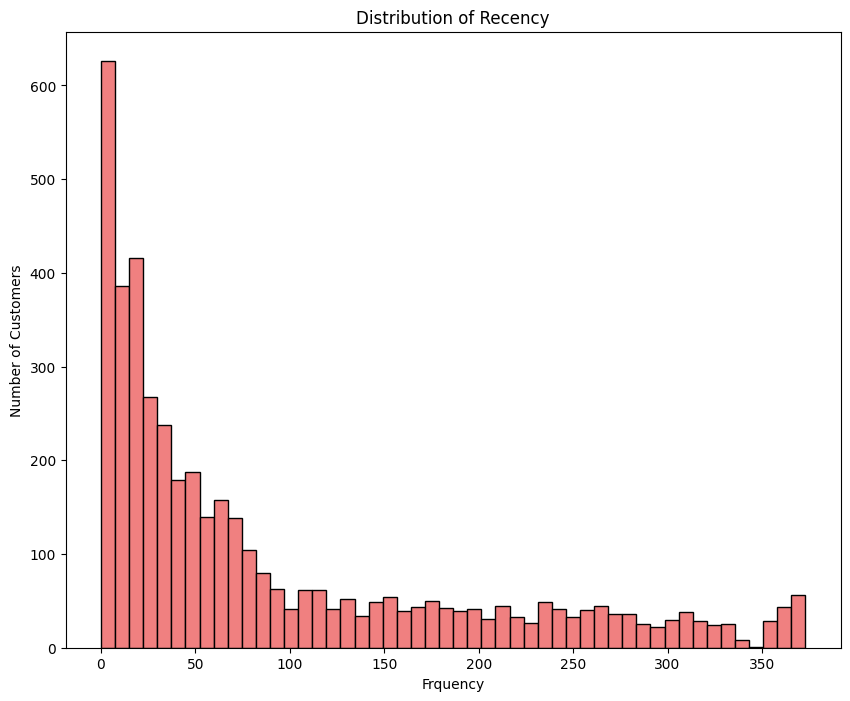

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.hist(recency_data['Recency'],bins=50,color='lightcoral',edgecolor='black')
plt.title('Distribution of Recency')
plt.xlabel('Frquency')
plt.ylabel('Number of Customers')
plt.show()

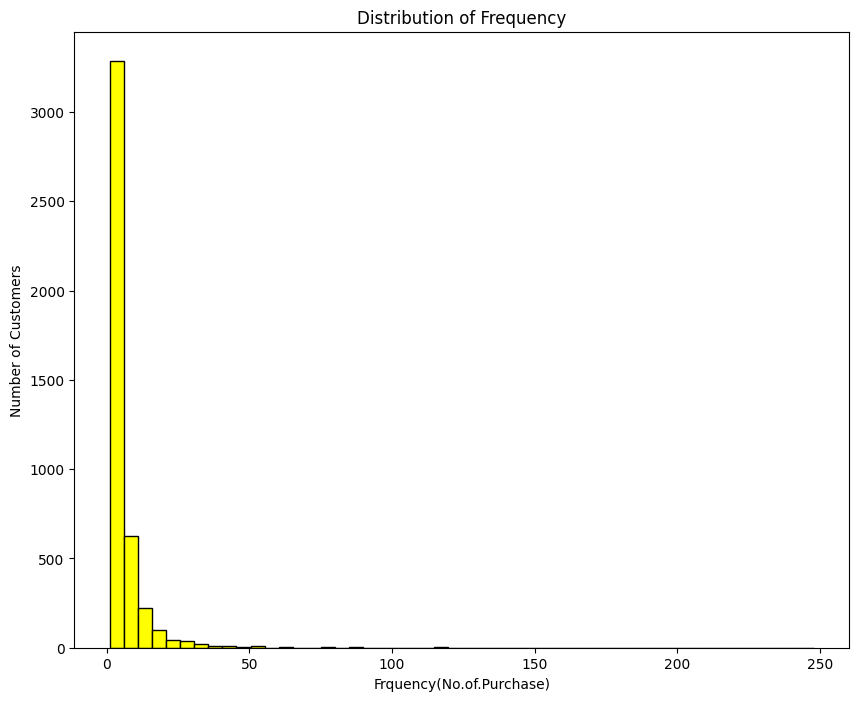

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(freq_data['Frequency'],bins=50,color='yellow',edgecolor='black')
plt.title('Distribution of Frequency')
plt.xlabel('Frquency(No.of.Purchase)')
plt.ylabel('Number of Customers')
plt.show()

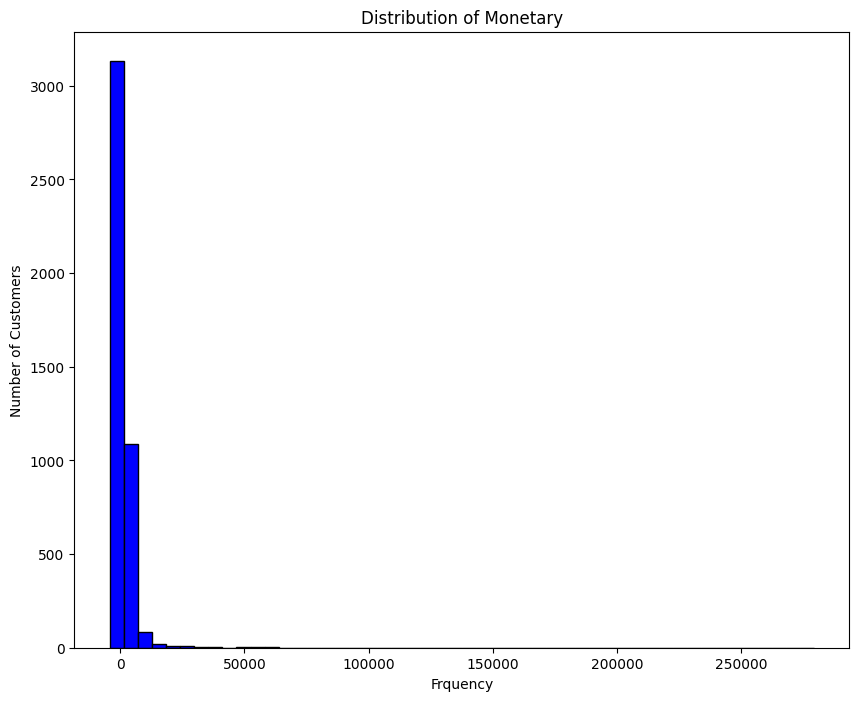

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(monetary_data['Monetary'],bins=50,color='blue',edgecolor='black')
plt.title('Distribution of Monetary')
plt.xlabel('Frquency')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
rfm_data = pd.merge(recency_data,freq_data,on='CustomerID')
rfm_data =pd.merge(rfm_data,monetary_data,on='CustomerID')
rfm_data

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:17:00,325,2,0.00
1,12347.0,2011-12-07 15:52:00,1,7,4310.00
2,12348.0,2011-09-25 13:13:00,74,4,1797.24
3,12349.0,2011-11-21 09:51:00,18,1,1757.55
4,12350.0,2011-02-02 16:01:00,309,1,334.40
...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60
4368,18281.0,2011-06-12 10:53:00,180,1,80.82
4369,18282.0,2011-12-02 11:43:00,7,3,176.60
4370,18283.0,2011-12-06 12:02:00,3,16,2045.53


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      325          2      0.00        0
1     12347.0        1          7   4310.00        0
2     12348.0       74          4   1797.24        0
3     12349.0       18          1   1757.55        0
4     12350.0      309          1    334.40        0


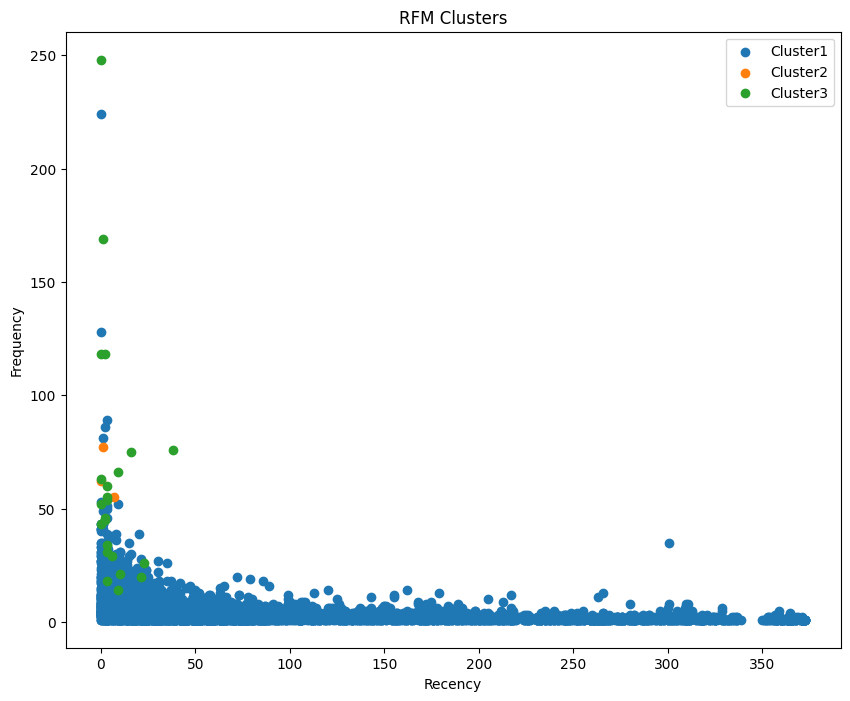

In [ ]:
from sklearn.cluster import KMeans

rfm_data = pd.merge(recency_data,freq_data,on='CustomerID')
rfm_data =pd.merge(rfm_data,monetary_data,on='CustomerID')

x=rfm_data[['Recency','Frequency','Monetary']]
num_clusters = 3

kmeans =KMeans(n_clusters=num_clusters,random_state=42)
rfm_data['Cluster']=kmeans.fit_predict(x)

print(rfm_data[['CustomerID','Recency','Frequency','Monetary','Cluster']].head())


plt.figure(figsize=(10,8))
for cluster in range(num_clusters):
  cluster_data = rfm_data[rfm_data['Cluster']==cluster]
  plt.scatter(cluster_data['Recency'],cluster_data['Frequency'],label=f'Cluster{cluster +1}')

plt.title('RFM Clusters')
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [ ]:
df2= pd.merge(recency_data,freq_data,on='CustomerID')
df2 =pd.merge(df2,monetary_data,on='CustomerID')

df1 = pd.DataFrame(df2)
df1

,CustomerID,InvoiceDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:17:00,325,2,0.00
1,12347.0,2011-12-07 15:52:00,1,7,4310.00
2,12348.0,2011-09-25 13:13:00,74,4,1797.24
3,12349.0,2011-11-21 09:51:00,18,1,1757.55
4,12350.0,2011-02-02 16:01:00,309,1,334.40
...,...,...,...,...,...
4367,18280.0,2011-03-07 09:52:00,277,1,180.60
4368,18281.0,2011-06-12 10:53:00,180,1,80.82
4369,18282.0,2011-12-02 11:43:00,7,3,176.60
4370,18283.0,2011-12-06 12:02:00,3,16,2045.53


In [ ]:
df1.drop('InvoiceDate',axis=1,inplace =True)
df1

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
...,...,...,...,...
4367,18280.0,277,1,180.60
4368,18281.0,180,1,80.82
4369,18282.0,7,3,176.60
4370,18283.0,3,16,2045.53


In [ ]:
df1['R_rank']=df1['Recency'].rank(ascending=False)
df1['F_rank']=df1['Frequency'].rank(ascending=True)
df1['M_rank']=df1['Monetary'].rank(ascending=True)

df1['R_rank_norm'] = (df1['R_rank']/df1['R_rank'].max())*100
df1['F_rank_norm'] = (df1['F_rank']/df1['F_rank'].max())*100
df1['M_rank_norm'] = (df1['M_rank']/df1['M_rank'].max())*100

df1.drop(columns=['R_rank','F_rank','M_rank'],inplace = True)
df1.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,325,2,0.00,3.865741,39.387008,1.063586
1,12347.0,1,7,4310.00,97.719907,81.427264,92.726441
2,12348.0,74,4,1797.24,38.182870,64.249771,77.721866
3,12349.0,18,1,1757.55,72.974537,15.027447,77.127173
4,12350.0,309,1,334.40,5.578704,15.027447,29.940531


In [ ]:
df1['RFM_Score']=0.15*df1['R_rank_norm']+0.28*df1['F_rank_norm']+0.57*df1['M_rank_norm']
df1['RFM_Score'] *= 0.05
df1=df1.round(2)
df1[['CustomerID','RFM_Score']]

,CustomerID,RFM_Score
0,12346.0,0.61
1,12347.0,4.52
2,12348.0,3.40
3,12349.0,2.96
4,12350.0,1.11
...,...,...
4367,18280.0,0.69
4368,18281.0,0.46
4369,18282.0,1.81
4370,18283.0,4.32


In [ ]:
import numpy as np
df1["Customer_segement"]=np.where(df1['RFM_Score'] > 4.5,
                                   "TOP CUSTOMERS",
                                   (np.where(df1["RFM_Score"] > 4,
                                             "HIGH VALUE CUSTOMERS",
                                             (np.where(df1["RFM_Score"] > 3,
                                                       "MEDIUM VALUE CUSTOMERS",
                                                       (np.where(df1["RFM_Score"] > 1.5,
                                                                 "LOW VALUE CUSTOMERS","LOST CUSTOMERS")))))))
df1[['CustomerID','RFM_Score','Customer_segement']]

,CustomerID,RFM_Score,Customer_segement
0,12346.0,0.61,LOST CUSTOMERS
1,12347.0,4.52,TOP CUSTOMERS
2,12348.0,3.40,MEDIUM VALUE CUSTOMERS
3,12349.0,2.96,LOW VALUE CUSTOMERS
4,12350.0,1.11,LOST CUSTOMERS
...,...,...,...
4367,18280.0,0.69,LOST CUSTOMERS
4368,18281.0,0.46,LOST CUSTOMERS
4369,18282.0,1.81,LOW VALUE CUSTOMERS
4370,18283.0,4.32,HIGH VALUE CUSTOMERS


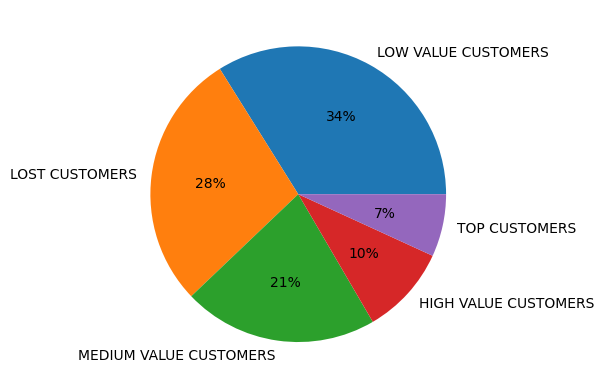

In [ ]:
import matplotlib.pyplot as plt

plt.pie(df1.Customer_segement.value_counts(),
        labels=df1.Customer_segement.value_counts().index,
        autopct='%.0f%%')
plt.show()